# Imersão Dados - Alura - 3ª edição
Análises por *Kalel Leonardo Martinho*

## 📝 Sobre o projeto:

Esse notebook tem como objetivo explorar o conjunto de dados que está relacionado a um experimento científico realizado in vitro para avaliação da atividade biológica de potenciais fármacos.

O projeto foi inspirado em um desafio do Laboratory innovation science at Harvard disponibilizando os dados em uma competição no kaggle.

# Aula 1 - Python, Pandas e Pharmacia
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importando dados
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
data = pd.read_csv(url_dados, compression = 'zip')
#Lendo a base de dados
data.head()


,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [2]:
data['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

In [3]:
data['tempo'].unique()

array([24, 72, 48], dtype=int64)

In [4]:
data['dose'].unique()

array(['D1', 'D2'], dtype=object)

In [5]:
data['droga'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

In [6]:
data['g-0'].unique()

array([ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598])

In [7]:
data['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [8]:
data['tratamento'].value_counts(normalize = True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

In [9]:
data['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

In [10]:
data['dose'].value_counts(normalize = True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

<AxesSubplot:>

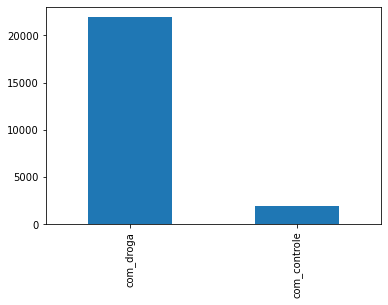

In [11]:
data['tratamento'].value_counts().plot.bar()

data['tempo'].value_counts().plot.bar().set_title('Tempo')

# Desafios Aula 1
---
### 01 - Investigar o porque a classe de tratamento é tão desbalanceada

É possível utilizar o mesmo controle para diversos casos (dependendo do tipo de pesquisa). Analisando os tratamentos é possível determinar que não estamos aplicando o efeito de uma determinada droga. Portanto, esse grupo pode ser utilizado como controle para cada uma das drogas estudadadas.

É bom reparar que na base de dados todos os dados de controle estão relacionados ao estudo de apenas uma droga.


### 02- Plotar as 5 últimas linhas da tabela

In [12]:
data.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,...,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


### 03- Calcular a proporção das classes de tratamento 

In [13]:
round(data['tratamento'].value_counts(normalize=True)*100, 2)

com_droga       92.16
com_controle     7.84
Name: tratamento, dtype: float64

### 04 - Quantas drogas foram investigadas?

In [14]:
len(data['droga'].unique())

3289

### 05 - Procurar na documentação o método query

In [15]:
data.query('`g-0` == 0')

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
894,id_090d5faab,com_droga,72,D1,c862a0e7a,0.0,-1.3750,-1.1620,0.1047,-0.8825,...,-1.4220,-1.2350,-6.9570,-0.8226,-1.8300,-4.3550,-1.0650,-1.8200,-1.3260,-0.7249
1380,id_0e68cbbb8,com_droga,72,D2,abec24ea6,0.0,0.8438,0.4109,0.2124,-0.6343,...,-0.1058,-1.0400,-0.3975,-1.6020,-5.0440,-1.2210,-2.3280,-1.9860,-3.1180,0.4858
2201,id_1788469a3,com_droga,24,D1,b5ff305ac,0.0,0.2660,-0.6781,-0.2641,-0.2061,...,0.8841,-0.0042,-0.0475,-0.0439,-0.8915,0.9616,0.4966,-1.2220,0.9120,-0.1879
3585,id_267bbbda0,com_droga,24,D2,19aae2313,0.0,-0.7200,0.3236,0.1556,-0.0591,...,0.0035,0.2455,-0.0344,0.0580,0.7679,0.2350,0.6269,-0.1610,-0.7621,0.4061
4886,id_34a35a55c,com_droga,72,D2,6e6a1d184,0.0,-0.4838,0.5112,-0.2475,-0.3100,...,0.3149,0.9208,0.5584,0.1674,1.1510,0.3661,0.3130,0.2335,0.7553,0.9155
5595,id_3c3423a3d,com_droga,24,D1,954007658,0.0,-1.0170,0.0505,0.0839,-0.3201,...,-0.4318,-1.1060,-1.0650,-0.0004,0.1127,1.2790,-1.0190,-1.5860,-0.2275,0.8549
5667,id_3d03b67a9,com_droga,72,D1,47c8f5451,0.0,0.1908,-0.4192,-0.1416,0.0447,...,0.1006,0.6606,-1.0290,0.3437,-0.0507,-0.4301,0.3007,0.8952,0.1277,-0.2204
6289,id_438f79667,com_droga,72,D2,124e2dd9b,0.0,-0.9770,-1.0430,1.3510,-1.2050,...,-2.1390,-2.5530,-0.5037,-1.1870,-3.3590,-1.2660,-2.4300,-1.1520,-0.8239,-0.9811
8022,id_560168f5c,com_droga,48,D2,9071eb625,0.0,-0.1271,-0.2505,0.7576,0.0122,...,0.2189,0.0347,-0.2085,-0.8690,-1.4550,-0.2173,-0.2602,-0.9836,-0.0871,-0.3563
9338,id_644aee88b,com_droga,48,D1,4b3c59823,0.0,0.9757,-1.2880,0.5361,2.4260,...,0.6108,1.5890,1.3160,0.7800,0.5336,1.2770,0.4707,1.1140,0.8708,0.7890


### 06 - Plotar um gráfico mais organizado

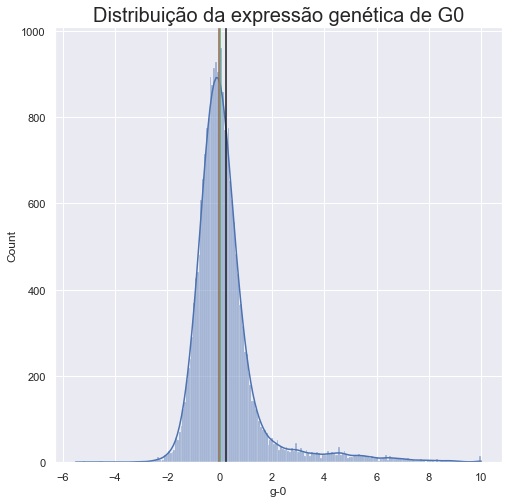

In [16]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font_scale=1, color_codes=True, rc=None)
plt.figure(figsize=(8,8))
sns.histplot(data=data, x='g-0', kde=True)
plt.title("Distribuição da expressão genética de G0", fontsize=20)
plt.axvline(data['g-0'].mean(), color='k')
plt.axvline(data['g-0'].median(), color='r')
plt.axvline(data['g-0'].mode()[0], color='g');

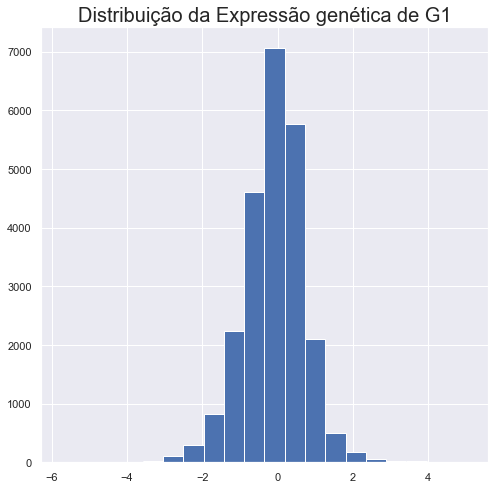

In [17]:
plt.figure(figsize=(8,8))
plt.hist(x='g-1', data=data, bins=20)
plt.title('Distribuição da Expressão genética de G1', fontsize=20);

### 07 - Renemoar as colunas removendo hífens

In [18]:
data_copy = data.copy()
data.columns = data.columns.str.replace("-", "")

In [19]:
data.head()

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


### Resumo da aula 01
- Importar banco de dados
- Entender os dados usando head(), tail(), info() e shape()
- Comparar as informaçÕes analisando as proporções entre as colunas
- Visualizar os dados utilizando diversors gráficos
- Analisar as distribuições das expressões genéticas utilizando um histograma
- Filtrar os dados utilizando subsets, locs e query

---
# Aula 2 - Estatísticas, dados e distribuições


In [20]:
#Renomear a coluna drogas por questões semânticas
#inplace faz com que a alteração seja aplicada na base de dados
data.rename(columns={'droga': 'composto'}, inplace=True)
data.head()


,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [21]:
#Seleciona os 5 compostos mais utilizados
id_compostos = data['composto'].value_counts().index[:5]

top_compostos = data.query('composto in @id_compostos')


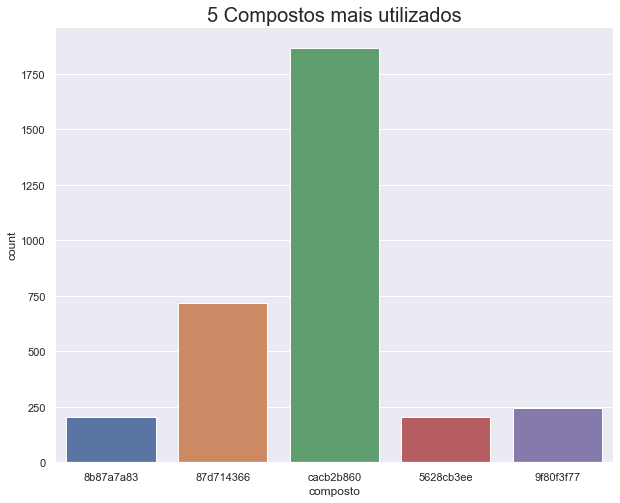

In [22]:
plt.figure(figsize=(10, 8))
plt.title("5 Compostos mais utilizados", fontsize=20)
sns.countplot(x = 'composto', data=top_compostos)
plt.show()

In [23]:
len(data['g0'].unique())

14367

In [24]:
data['g0'].max()


10.0

In [25]:
data['g0'].min()

-5.513

<AxesSubplot:>

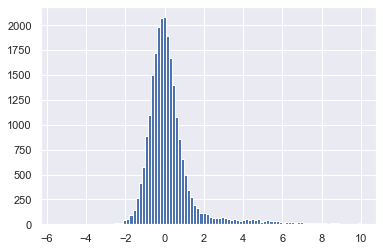

In [26]:
data['g0'].hist(bins = 100)

In [27]:
data.describe()

,tempo,g0,g1,g2,g3,g4,g5,g6,g7,g8,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


In [28]:
data.loc[:, 'g0':'g771'].describe()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,...,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,...,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,...,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,...,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,...,-0.433875,-0.502250,-0.537075,-0.508775,-0.606175,-0.506200,-0.353100,-0.544600,-0.554400,-0.523800
50%,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,0.160450,...,0.059600,-0.005900,-0.013600,-0.027700,-0.011850,0.009900,0.005400,0.000600,0.028700,-0.006500
75%,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,0.697775,...,0.648500,0.492150,0.522500,0.457000,0.483000,0.511175,0.409075,0.498500,0.496400,0.536950
max,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,6.433000,...,10.000000,9.552000,10.000000,8.346000,5.444000,6.317000,10.000000,5.911000,10.000000,10.000000


<AxesSubplot:>

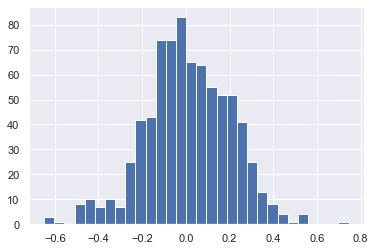

In [29]:
data.loc[:, 'g0':'g771'].describe().T['mean'].hist(bins=30)

<AxesSubplot:>

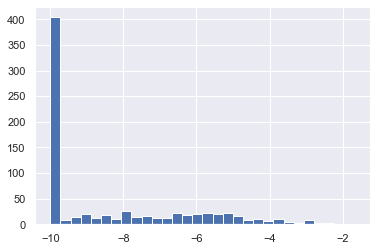

In [30]:
data.loc[:, 'g0':'g771'].describe().T['min'].hist(bins=30)

<AxesSubplot:>

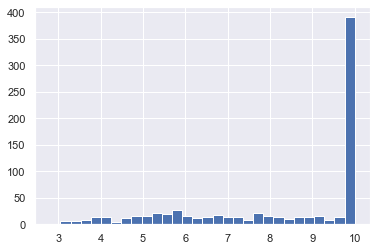

In [31]:
data.loc[:, 'g0':'g771'].describe().T['max'].hist(bins=30)

<AxesSubplot:>

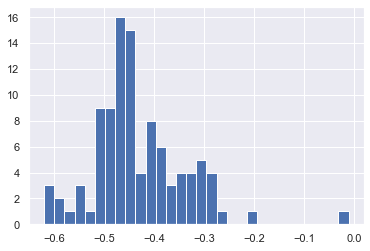

In [32]:
data.loc[:, 'c0':'c99'].describe().T['mean'].hist(bins=30)

<AxesSubplot:xlabel='g0', ylabel='tratamento'>

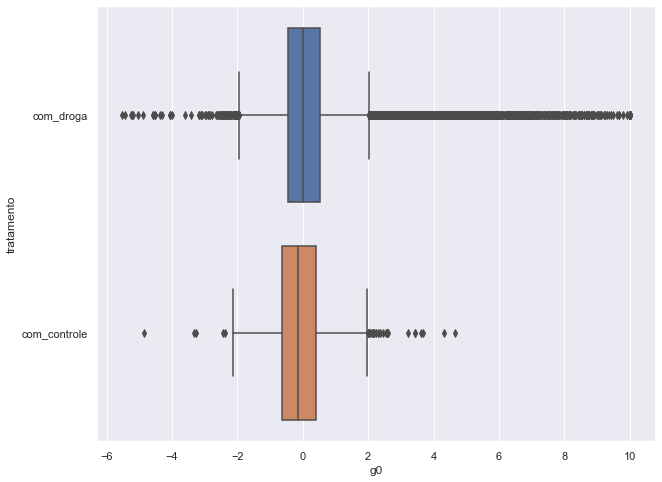

In [33]:
plt.figure(figsize=(10,8))
sns.boxplot(x='g0', y='tratamento' , data=data)

### Desafios Aula 02
### 01 - Ordenar gráfico countplot

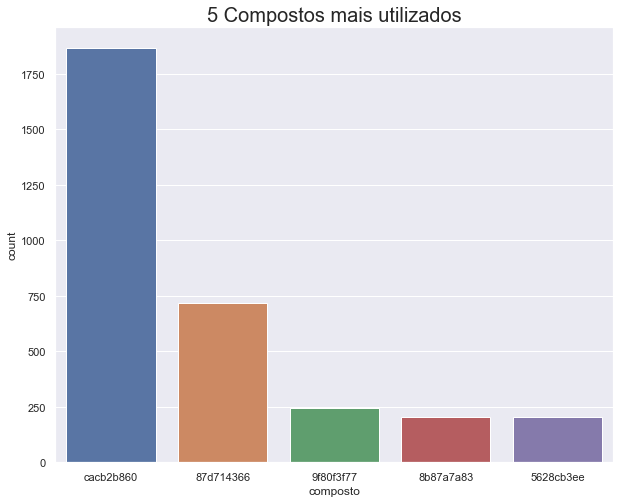

In [34]:
plt.figure(figsize=(10, 8))
plt.title("5 Compostos mais utilizados", fontsize=20)
sns.countplot(x = 'composto', order=id_compostos, data=top_compostos)
plt.show()

### 02 - Alterar tamanho da fonte

In [35]:
sns.set(font_scale=1)

### 03 - Plotar os histogramas com seaborn

<AxesSubplot:xlabel='mean', ylabel='Count'>

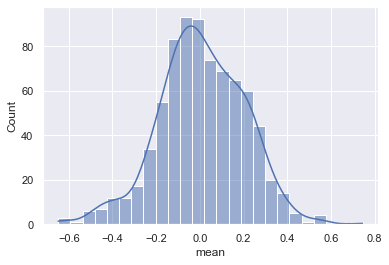

In [36]:
sns.histplot(data=data.loc[:, 'g0':'g771'].describe().T, x='mean', kde=True)

<AxesSubplot:xlabel='mean', ylabel='Count'>

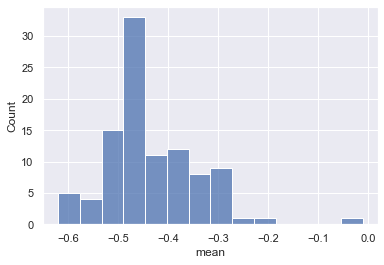

In [37]:
sns.histplot(data=data.loc[:, 'c0':'c99'].describe().T, x='mean', kde=False)

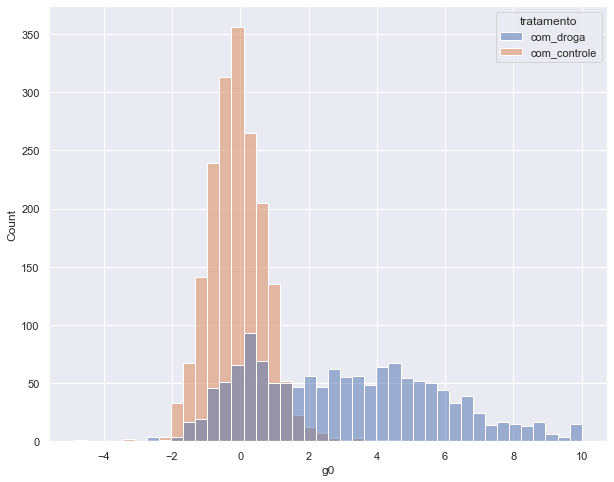

In [38]:
plt.figure(figsize=(10,8))
sns.histplot(data=top_compostos, x='g0', hue='tratamento', );

### 04 - Estudar sobre as estatísticas retornadas no .describe()

> .describe() retorna valores importantes para o estudo dos dados, como média, mediana, valores máximos, mínimos, desvio padrão e outros. Mais informações na [documentação.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

### 05 - Refletir sobre a manipulação do tamanho das visualizações
> Esse [artigo](https://www.alura.com.br/artigos/visualizando-informacoes-com-um-grafico) pode ajudar sobre o processo de reflexão, contendo informações essenciais sobre gráficos.



### 06 - Fazer outras análises com boxblot e com histograma

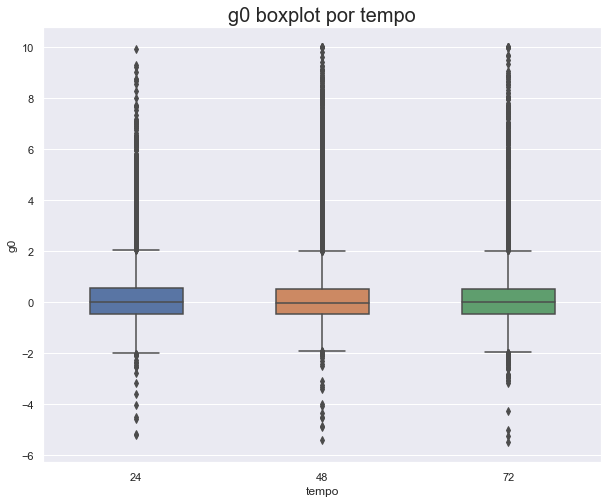

In [39]:
plt.figure(figsize=(10,8))
plt.title("g0 boxplot por tempo", fontsize=20)
sns.boxplot(y='g0', data=data, x='tempo', width=0.5 );

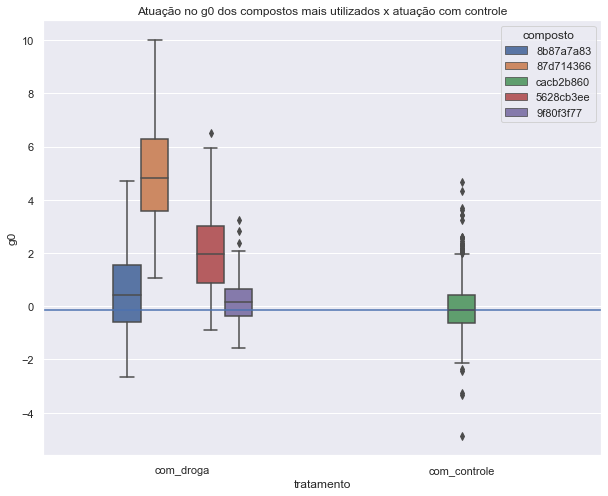

In [40]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(y='g0', data=top_compostos, x='tratamento', width=0.5, hue='composto' )
ax.set_title('Atuação no g0 dos compostos mais utilizados x atuação com controle')
ax.axhline(y=data.query('tratamento == "com_controle"')['g0'].median());

---
# Aula 3 - Correlações, causalidade, e relações entre genes. 

In [41]:
pd.crosstab(data['dose'], data['tempo'])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [42]:
pd.crosstab([data['dose'], data['tempo']], data['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [43]:
pd.crosstab([data['dose'], data['tempo']], data['tratamento'], normalize='index') 

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [44]:
pd.crosstab([data['dose'], data['tempo']], data['tratamento'], values=data['g0'], aggfunc='mean') 

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

<AxesSubplot:xlabel='g0', ylabel='g3'>

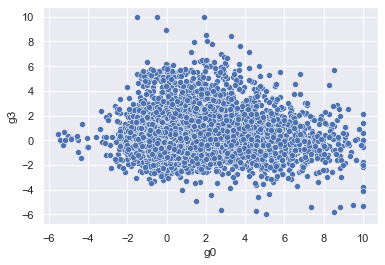

In [45]:
sns.scatterplot(x='g0', y='g3', data=data)

In [46]:
data[['g0', 'g3']]

,g0,g3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


<AxesSubplot:xlabel='g0', ylabel='g8'>

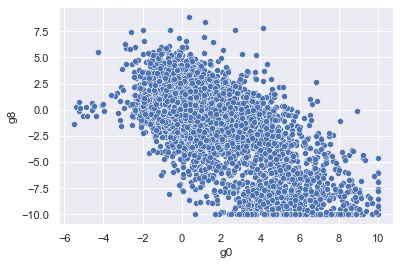

In [47]:
sns.scatterplot(x='g0', y='g8', data=data)

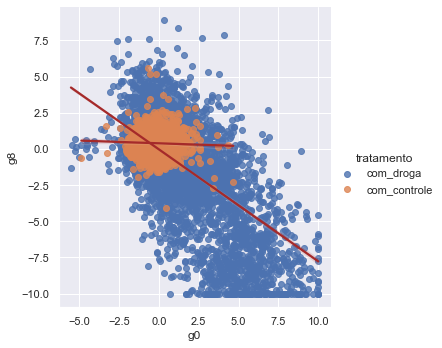

In [48]:
sns.lmplot(x='g0', y='g8', data=data, line_kws={'color':'brown'}, hue='tratamento')

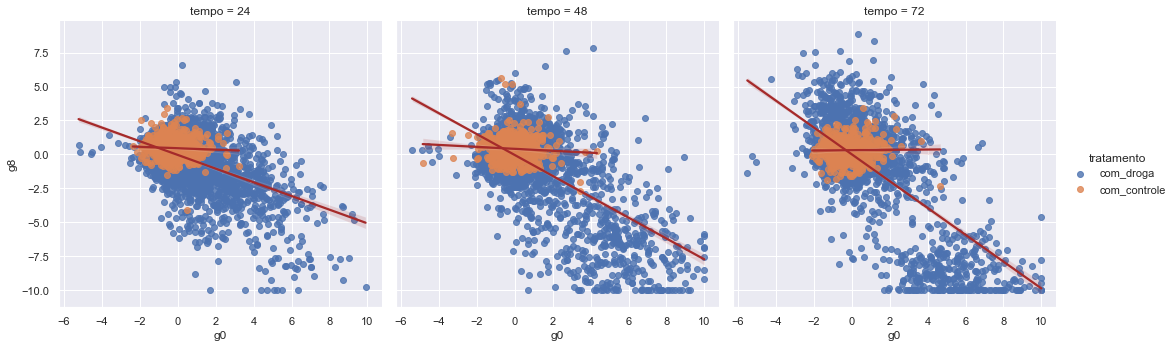

In [49]:
sns.lmplot(x='g0', y='g8', data=data, line_kws={'color':'brown'}, hue='tratamento', col='tempo')

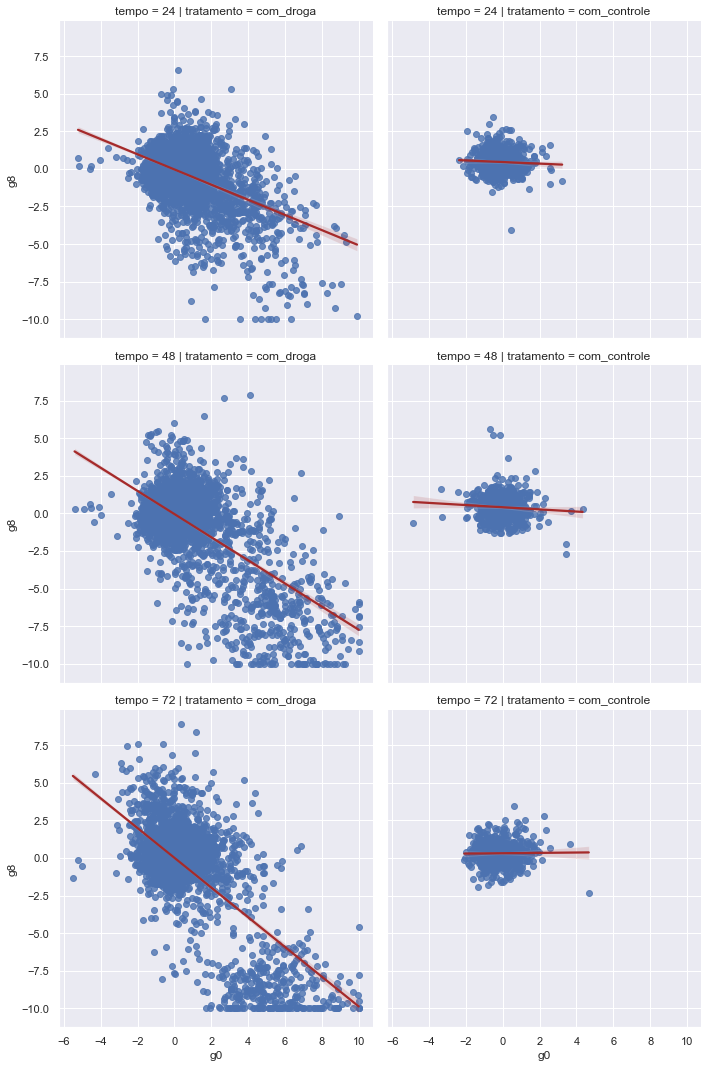

In [50]:
sns.lmplot(x='g0', y='g8', data=data, line_kws={'color':'brown'}, col='tratamento', row='tempo')

In [51]:
# Definindo váriaveil para as colunas g

desc_g = data.loc[:, 'g0':'g771']
desc_g.head()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,...,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,...,-0.5055,-0.3167,1.0930,0.0084,0.8611,-0.5582,0.3008,1.6490,0.2968,-0.0224
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,...,-0.5338,0.0224,-0.4831,0.2128,-0.6999,-0.1214,-0.1626,-0.3340,-0.3289,-0.2718
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,...,2.5770,0.2356,1.3230,-1.3730,-0.2682,0.8427,0.5797,0.3143,0.8133,0.7923
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,...,-0.1292,3.4310,1.2720,-0.4733,-2.0560,0.5699,0.1996,0.4374,0.1588,-0.0343
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,...,-0.6904,2.0540,-0.3131,-0.0809,0.3910,1.7660,-1.0020,-0.7534,0.5000,-0.6269


In [52]:
# Definindo váriavel para as colunas c
desc_c = data.loc[:, 'c0':'c99']
desc_c.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,-0.0600,0.1083,0.6864,0.4043,0.4213,-0.6797,0.2888,0.4323,-0.3381,0.3407,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,0.0927,0.2723,0.2772,0.7776,0.3679,0.5696,0.2835,1.4080,0.3745,0.6775,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,-0.1312,-1.4640,0.3394,-1.7790,0.2188,0.5826,-0.7513,0.0543,0.7182,-0.4159,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,-0.3998,-4.5520,-2.7350,-1.9630,-2.8610,-1.2670,-2.5830,-0.5036,-3.1590,-1.8510,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,-0.3774,0.7364,-0.1659,0.2341,1.0060,0.3204,-0.0852,-0.2284,-0.2533,-0.3174,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [53]:
desc_g.corr()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,...,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,...,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,...,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,...,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,...,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,...,-0.023752,-0.164868,0.404440,0.317500,-0.225094,0.124425,0.115579,-0.172727,-0.363673,0.250713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g767,-0.052622,-0.003378,-0.053149,-0.179370,0.124425,-0.081016,-0.000886,0.137336,-0.101191,-0.013157,...,-0.010391,-0.180252,0.003976,-0.027425,0.153722,1.000000,-0.048393,0.065450,0.008603,-0.001136
g768,0.300241,-0.030756,0.115415,0.028452,0.115579,-0.139000,-0.005791,-0.419437,-0.209968,-0.291836,...,0.077292,0.000048,0.403211,0.241509,-0.250512,-0.048393,1.000000,0.079364,-0.382607,0.351651
g769,-0.127375,-0.006866,0.014489,-0.206077,-0.172727,-0.068537,-0.278587,-0.082554,0.268571,0.037013,...,0.020662,0.071082,0.013235,0.021152,0.151940,0.065450,0.079364,1.000000,0.135853,-0.083713
g770,-0.514201,-0.095108,-0.078661,-0.002142,-0.363673,0.144631,-0.143428,0.402451,0.441011,0.415967,...,0.014331,-0.010849,-0.498222,-0.489116,0.284882,0.008603,-0.382607,0.135853,1.000000,-0.425063


Mapa de calor para matrizes de correlações

<AxesSubplot:>

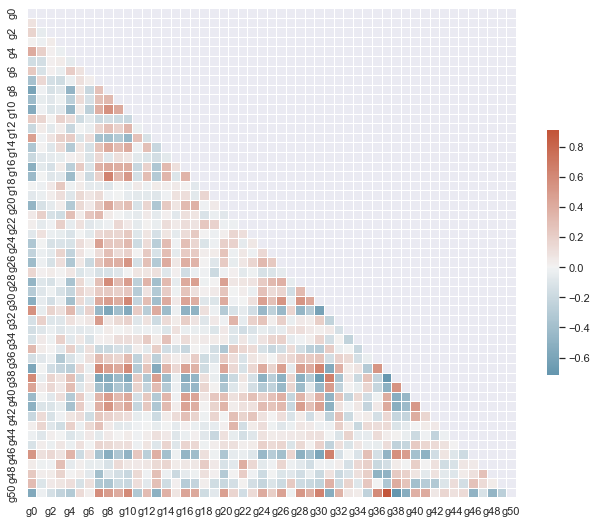

In [54]:
corr_g = data.loc[:, 'g0':'g50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_g, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_g, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#Lembrando que as corelações não explicam a causalidade

<AxesSubplot:>

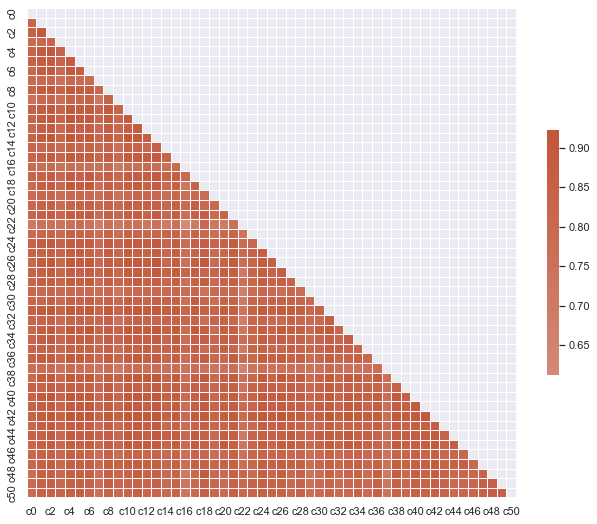

In [55]:
corr_cel = data.loc[:, 'c0':'c50'].corr()
# Os C são referentes a viabilidade celular

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_cel, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_cel, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#Lembrando que as corelações não explicam a causalidade

## Desafios Aula 3
### 01 - Criar tabelas de frequência com pandas.groupby()

In [56]:
droga = data[data['tratamento']=='com_droga'].groupby(['dose','tempo']).count()['tratamento']
droga

dose  tempo
D1    24       3585
      48       4011
      72       3600
D2    24       3581
      48       3591
      72       3580
Name: tratamento, dtype: int64

In [57]:
controle = data[data['tratamento']=='com_controle'].groupby(['dose','tempo']).count()['tratamento'] #Agrupa os dados por dose e por tempo e faz a contagem para os dados com_controle
controle

dose  tempo
D1    24       301
      48       343
      72       307
D2    24       305
      48       305
      72       305
Name: tratamento, dtype: int64

In [58]:
# Concantenando com controle e com droga
freq_d_c = pd.concat([controle, droga], axis=1)
freq_d_c.columns = ['Com controle','Com droga']

freq_d_c

Com controle  Com droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [59]:
freq_d_c.div(freq_d_c.sum(axis=1),axis=0) # Normalizado

Com controle  Com droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

### 02 - Normalizar crosstab pela coluna

In [60]:
pd.crosstab([data['dose'], data['tempo']], data['tratamento'], normalize='columns') 

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

### 03 - Utilizar outros agregadores em aggfunc

In [61]:
pd.crosstab([data['dose'], data['tempo']], data['tratamento'], values=data['g0'], aggfunc=['mean', 'median', 'min', 'max']) 

mean                 median                    min  \
tratamento com_controle com_droga com_controle com_droga com_controle   
dose tempo                                                              
D1   24       -0.251760  0.367996      -0.2912   0.02700       -2.370   
     48       -0.122773  0.412469      -0.2145   0.01620       -3.276   
     72       -0.295271  0.286250      -0.3655   0.02615       -2.086   
D2   24        0.010754  0.115253       0.0096  -0.02610       -2.135   
     48        0.013174  0.214480      -0.0506  -0.02960       -4.859   
     72        0.070250  0.253439       0.0528   0.00015       -1.909   

                              max            
tratamento com_droga com_controle com_droga  
dose tempo                                   
D1   24       -5.183        3.226     9.908  
     48       -5.420        3.423    10.000  
     72       -5.261        2.584     9.355  
D2   24       -5.233        2.601     7.167  
     48       -4.567        4.335    10.000  
     72       -5.513        4.670    10.000

Com .groupby()

In [62]:
freq_d_c.agg(['mean', 'median','min', 'max'])

,Com controle,Com droga
mean,311.0,3658.0
median,305.0,3588.0
min,301.0,3580.0
max,343.0,4011.0


### 04 - Explorar o melt

In [63]:
pd.melt(data,id_vars=['dose'],value_vars=['g0'])


,dose,variable,value
0,D1,g0,1.0620
1,D1,g0,0.0743
2,D1,g0,0.6280
3,D1,g0,-0.5138
4,D2,g0,-0.3254
...,...,...,...
23809,D2,g0,0.1394
23810,D2,g0,-1.3260
23811,D2,g0,0.3942
23812,D1,g0,0.6660


In [64]:
pd.melt(data,id_vars=['tratamento'],value_vars=['g10'])


,tratamento,variable,value
0,com_droga,g10,1.1830
1,com_droga,g10,-1.1520
2,com_droga,g10,-0.4797
3,com_droga,g10,-0.8269
4,com_droga,g10,-0.2219
...,...,...,...
23809,com_droga,g10,0.2531
23810,com_droga,g10,-0.1851
23811,com_controle,g10,-0.1854
23812,com_droga,g10,0.5742


### 05 - Analisar a correlação entre g e c. Refletir sobre os efeitos biológicos


In [65]:
# Filtrando expressões gênicas e tipos celulares
corr_all = data.loc[:,'g0':'c99'].corr()
#Armazenando expressões em linhas e tipos celulares em colunas
corr_c_g = corr_all.loc['g0':'g50','c0':'c50']

<AxesSubplot:>

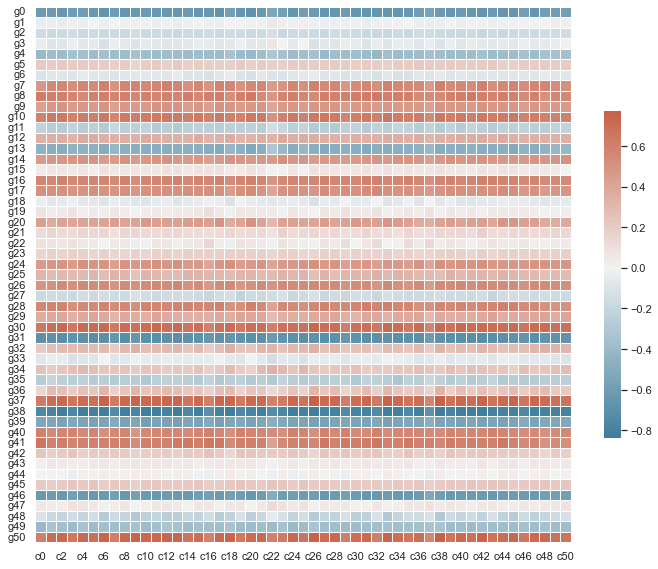

In [66]:
# grafico de correlação de g com c
f, ax = plt.subplots(figsize=(12, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_c_g, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:xlabel='g44', ylabel='c13'>

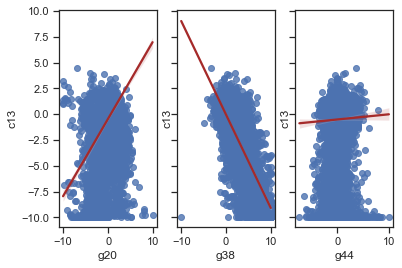

In [67]:

sns.set_style('ticks')
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.regplot(ax=ax1, data=data, x='g20', y='c13', line_kws={'color': 'brown'})
sns.regplot(ax=ax2, data=data, x='g38', y='c13', line_kws={'color': 'brown'})
sns.regplot(ax=ax3, data=data, x='g44', y='c13', line_kws={'color': 'brown'})

### 06 - Estudar o código que plota a matriz de correlação heatmap

In [68]:
np.ones_like(corr_g, dtype=bool) # Gera uma matriz boolean no tamanho do dataframe de correlação g0 até g50

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [69]:
mask = np.triu(np.ones_like(corr_g, dtype=bool)) #Cria uma paleta de cores com o Azul para correlações negativas e e Laranja para as positivas
mask


array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

In [70]:
cmap = sns.diverging_palette(h_neg=220, h_pos=20, as_cmap=True)
#Desenha um mapa de calor aplicando a mascara e utilizando a paleta de cores.

<AxesSubplot:>

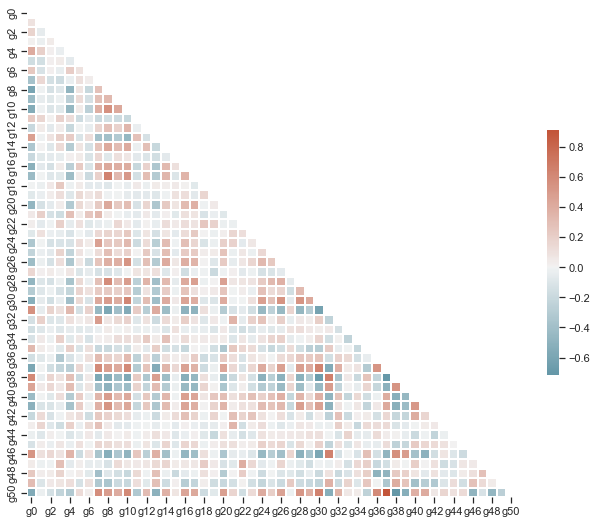

In [71]:
# Comando equivale ao plt.figure com a diferença que separa entre figura e eixos
# f, ax = plt.subplots(figsize=(11, 9))

plt.figure(figsize=(11, 9))

sns.heatmap(corr_g, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.2, cbar_kws={"shrink": .5})

### 07 - Resumo do que aprendeu com os dados
---

> Algumas variáveis genéticas tem efeitos sobre os tipos celulares e outras (como mostra o desafio 5);
As correlações negativas podem estar ligadas ao fato dos genes ligados a morte celular;
As correlações positivas inicam maior viabilidade entre a correlação dos genes com as células;
É bom ressaltar que nem todas as correlações vistas explicam causalidade.

# Aula 4 - Merge de dados e análise de resultados
---

In [72]:
# Lendo dados dos resultados
url_resultados = "https://raw.githubusercontent.com/alura-cursos/imersao-dados-desafio-final/main/Dados/dados_resultados.csv"
resultados = pd.read_csv(url_resultados)

In [73]:
resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
contagem_moa = resultados.select_dtypes('int64').sum().sort_values(ascending=False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
elastase_inhibitor                              6
steroid                                         6
atm_kinase_inhibitor                            6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

In [75]:
resultados.drop('id', axis=1).sum(axis=1)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

In [76]:
resultados['n_moa'] = resultados.drop('id', axis=1).sum(axis=1)



In [77]:
resultados.tail()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
23813,id_ffffdd77b,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
resultados['active_moa'] = (resultados['n_moa'] != 0)

In [79]:
resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,active_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


In [80]:
merged_data = pd.merge(data, resultados[['id', 'n_moa', 'active_moa']], on='id')

In [81]:
merged_data.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,active_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [82]:
merged_data.query('tratamento == "com_controle"')

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,active_moa
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,...,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050,0,False
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,...,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820,0,False
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,...,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180,0,False
47,id_008a986b7,com_controle,48,D2,cacb2b860,0.4860,0.1430,0.5281,-0.0022,-0.2334,...,0.7629,0.3288,-0.9915,-0.3694,-0.4979,0.5281,-0.9245,-0.9367,0,False
63,id_009d8340f,com_controle,24,D2,cacb2b860,0.4471,-0.0839,-0.3864,0.3196,0.2584,...,0.7665,0.7932,-0.6804,-0.0435,0.0949,0.2000,-0.4326,0.9364,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23729,id_ff1f9e5fc,com_controle,24,D1,cacb2b860,0.0465,0.6430,-0.2453,0.3521,0.6195,...,-0.2065,0.8314,-0.1891,-0.0074,0.2131,-0.1419,-0.2422,0.0457,0,False
23747,id_ff469c482,com_controle,72,D1,cacb2b860,-0.6204,-1.3800,-1.1880,-0.6573,-0.8408,...,0.5468,1.1450,0.5254,0.6224,-0.9630,0.8872,-0.0742,-0.6777,0,False
23768,id_ff89331ca,com_controle,72,D2,cacb2b860,-0.1051,0.4335,0.3648,-0.0525,-0.3632,...,0.4963,0.9434,-0.4779,0.6951,0.9517,-0.8110,-0.1748,-0.3626,0,False
23793,id_ffd26f361,com_controle,48,D2,cacb2b860,0.6008,0.2781,-0.3319,-0.8782,0.9281,...,-0.2065,-0.4918,0.7863,0.0504,0.8813,0.7757,-0.5272,0.7082,0,False


In [83]:
merged_data.query('tratamento == "com_droga"')['active_moa'].value_counts()

True     14447
False     7501
Name: active_moa, dtype: int64

<AxesSubplot:xlabel='composto', ylabel='g0'>

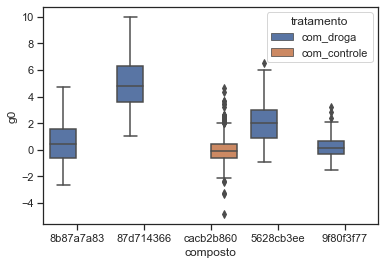

In [84]:
sns.boxplot(data = top_compostos, y = 'g0', x='composto', hue='tratamento')

---
## Desafios Aula 04

---

### 01 - Encontrar o top 10 das ações do MOA (inibidor, agonista...)

In [85]:
count_moa = resultados.drop(['id', 'n_moa', 'active_moa'], axis=1).sum().sort_values(ascending=False)
count_moa = count_moa.reset_index()
count_moa.rename(columns={'index':'MOAs',0: 'Count'}, inplace=True)

In [86]:
count_moa['sufix'] = count_moa['MOAs'].apply(lambda x: x.split('_')[-1])
count_moa

,MOAs,Count,sufix
0,nfkb_inhibitor,832,inhibitor
1,proteasome_inhibitor,726,inhibitor
2,cyclooxygenase_inhibitor,435,inhibitor
3,dopamine_receptor_antagonist,424,antagonist
4,serotonin_receptor_antagonist,404,antagonist
...,...,...,...
201,elastase_inhibitor,6,inhibitor
202,steroid,6,steroid
203,atm_kinase_inhibitor,6,inhibitor
204,erbb2_inhibitor,1,inhibitor


In [87]:
active_per_sufix = count_moa.groupby('sufix').sum()['Count'].sort_values(ascending=False)

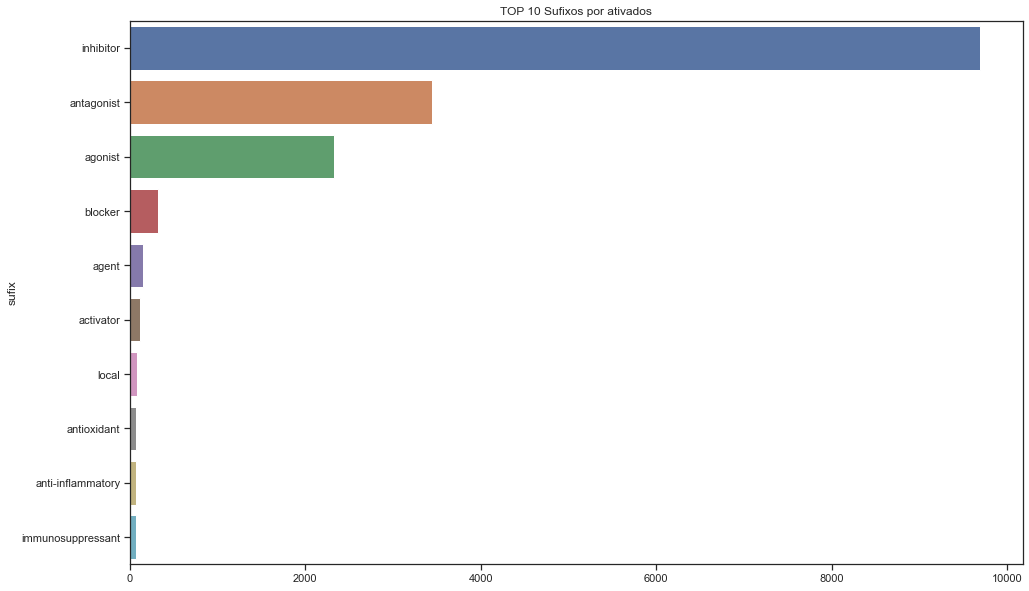

In [88]:
fig, ax = plt.subplots(1,1,figsize=(16,10))
sns.barplot(y=active_per_sufix.head(10).index,
            x=active_per_sufix.head(10).values, ax=ax, orient='h')
ax.set_title("TOP 10 Sufixos por ativados")

plt.show()

In [89]:
total_per_sufix = count_moa.groupby('sufix').count()['Count'].sort_values(ascending=False)

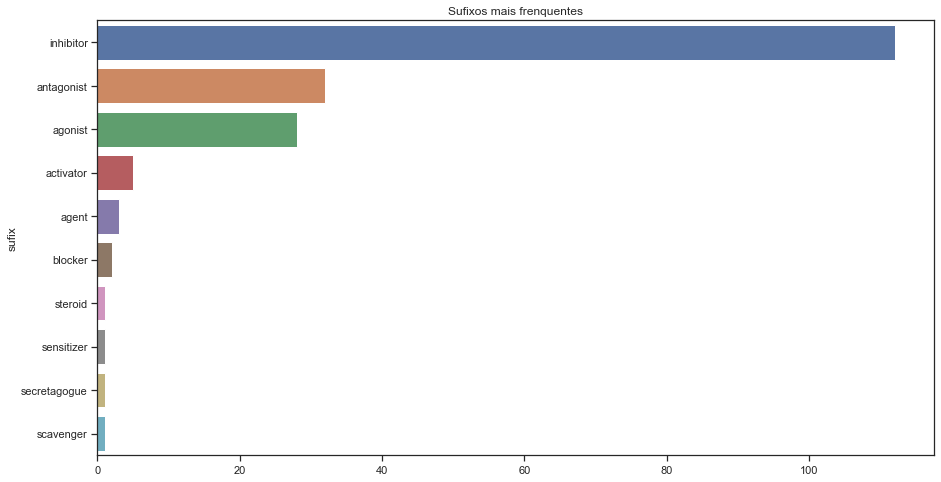

In [90]:
fig, ax = plt.subplots(1,1,figsize=(15,8))
sns.barplot(y=total_per_sufix.index[:10],
            x=total_per_sufix.values[:10], ax=ax, orient='h')
ax.set_title("Sufixos mais frenquentes")

plt.show()

In [91]:
sufix_relative = (active_per_sufix / total_per_sufix).sort_values(ascending=False)

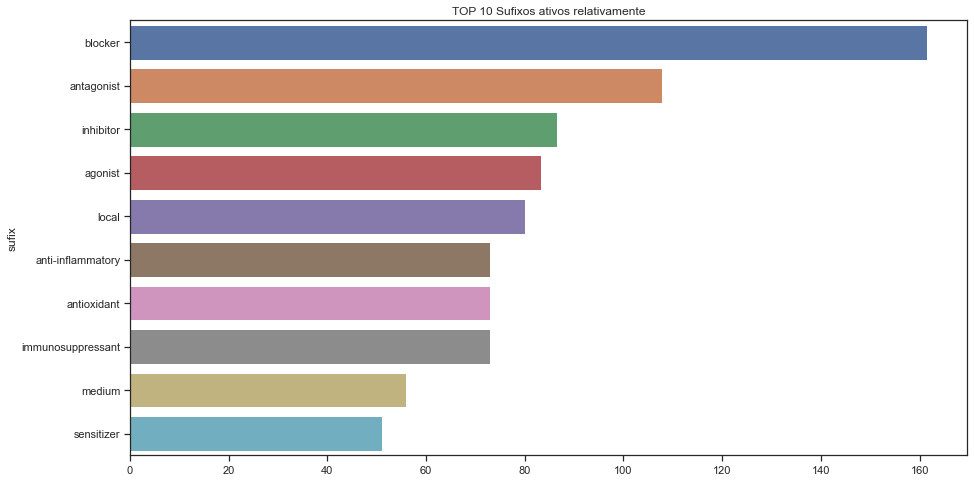

In [92]:
fig, ax = plt.subplots(1,1,figsize=(15,8))
sns.barplot(y=sufix_relative.index[:10],
            x=sufix_relative.values[:10], ax=ax, orient='h')
ax.set_title("TOP 10 Sufixos ativos relativamente")

plt.show()

### 02 - Criar coluna controle para quando na linha tratamento == com_controle

In [93]:
merged_data['eh_controle'] = (merged_data['tratamento'] == 'com_controle')


In [94]:
merged_data.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c93,c94,c95,c96,c97,c98,c99,n_moa,active_moa,eh_controle
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,False
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,False
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,False


### 03 - Criar 3 colunas referentes ao tempo

In [95]:
from sklearn.preprocessing import OneHotEncoder
# Vou utilizar OneHotEncoder do sklearn
ohc = OneHotEncoder(sparse=False)

In [96]:
np.asarray(merged_data['tempo']).reshape(-1,1)

array([[24],
       [72],
       [48],
       ...,
       [48],
       [24],
       [72]], dtype=int64)

In [97]:
encoded = ohc.fit_transform(np.asarray(merged_data['tempo']).reshape(-1,1))

In [98]:
encoded.shape

(23814, 3)

In [99]:
merged_data['24'] = encoded[:,0]
merged_data['48'] = encoded[:,1]
merged_data['72'] = encoded[:,2]

In [100]:
merged_data['24'].head()

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 24, dtype: float64

In [101]:
merged_data['48'].head()

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: 48, dtype: float64

In [102]:
merged_data['72'].head()

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: 72, dtype: float64

Poderiamos tambem utilizar o função get_dummies do Pandas. 

`pd.get_dummies(merged_data, columns=['tempo'])`




### 04 - Estudar sobre combinações de DF

> Podemos encontrar detalhes sobre na [documentação.](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)


### 05 - Análise detalha considerando tempo - Escolher uma droga e comparar com controle

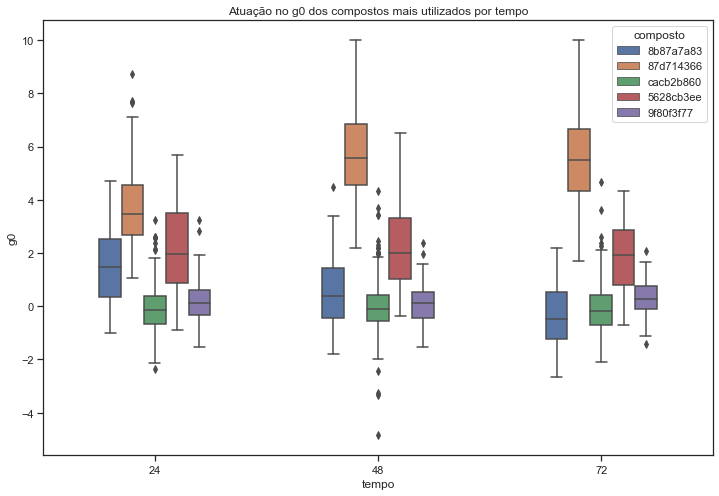

In [103]:
plt.figure(figsize=(12,8))
az = sns.boxplot(y='g0', data=top_compostos, x='tempo', width=0.5, hue='composto' )
az.set_title('Atuação no g0 dos compostos mais utilizados por tempo')
plt.show()

Escolhendo uma droga específica para comparar com controle

In [104]:
compostos = ['87d714366', 'cacb2b860']
escolhidos = merged_data.query('composto in @compostos')

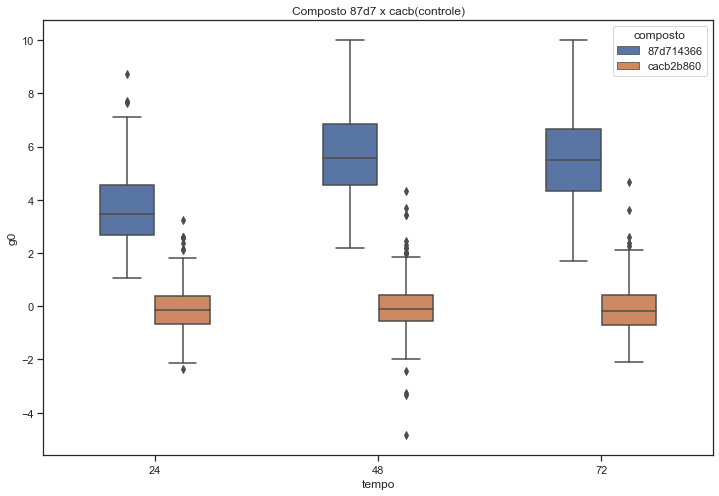

In [105]:
plt.figure(figsize=(12,8))
az = sns.boxplot(y='g0', data=escolhidos, x='tempo', width=0.5, hue='composto' )
az.set_title('Composto 87d7 x cacb(controle)')
plt.show()

### 06 - Descobrir se algum composto que dependendo da configuração do experimento ativa ou não algum MOA

In [106]:
merged_data.groupby('composto').active_moa.mean().value_counts()

1.0    2076
0.0    1213
Name: active_moa, dtype: int64

Nota-se que temos apenas Trues e Falses como resultados.
Ou seja, quando um composto é ativado já aparece em cada uma das fases.

### 07 - Descobrir se algum composto ativa MOAS diferentes

In [107]:
resumo = merged_data.query('active_moa==True')[['composto','dose','tempo','n_moa']]
diferentes=[]

for composto in resumo['composto'].unique():
  mudanca=False
  dftemp=resumo.query('composto== @composto')
  mudanca=dftemp['n_moa'].nunique() != 1
  if mudanca:
    diferentes.append(composto)
  
diferentes

[]

Não, as configurações dos experimentos não influenciam nos mecanimos ativos pelos compostos.

---
# Aula 05 - Machine Learning

In [108]:
merged_data.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c96,c97,c98,c99,n_moa,active_moa,eh_controle,24,48,72
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,-0.3981,0.2139,0.3801,0.4176,1,True,False,1.0,0.0,0.0
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.1522,0.1241,0.6077,0.7371,0,False,False,0.0,0.0,1.0
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.6417,-0.2187,-1.4080,0.6931,3,True,False,0.0,1.0,0.0
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False,0.0,1.0,0.0
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.1094,0.2885,-0.3786,0.7125,1,True,False,0.0,0.0,1.0


In [109]:
resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,active_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


In [110]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [111]:
model_r = LogisticRegression(max_iter = 1000)


X = merged_data.drop(['id', 'n_moa', 'active_moa', 'composto', 'tratamento', 'tempo'], axis = 1)
X = pd.get_dummies(X, columns=['dose'])
y = merged_data.active_moa
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify= y, train_size=0.8, random_state=0)
model_r.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [112]:
model_r.score(X_test, y_test)

0.6653369724963258

In [113]:
model_d = DummyClassifier('most_frequent')
model_d.fit(X_train, y_train)
dummy_pred = model_d.predict(X_test)
accuracy_score(y_test, dummy_pred)

C:\Users\kalel\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass strategy=most_frequent as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.6067604450976275

In [114]:
model_tree = DecisionTreeClassifier(max_depth = 3)
model_tree.fit(X_train, y_train)
tree_pred = model_tree.predict(X_test)
accuracy_score(y_test, tree_pred)

0.6909510812513122

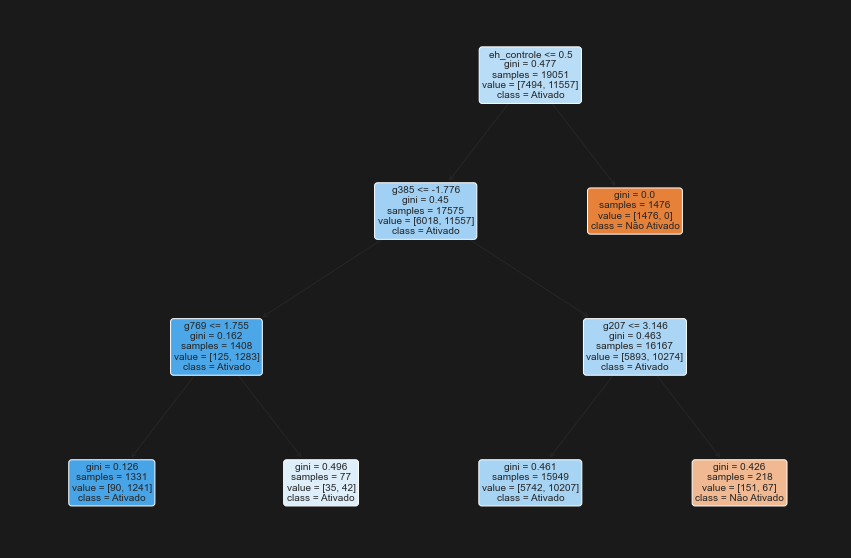

In [115]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(15, 10), facecolor='k')
tree.plot_tree(model_tree,
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=X_train.columns,
               class_names=['Não Ativado', 'Ativado'])

plt.show()

In [116]:
tree_test = []
tree_train = []
for i in range(1, 10):
    model_tree = DecisionTreeClassifier(max_depth = i)
    model_tree.fit(X_train, y_train)
    tree_test.append(model_tree.score(X_test, y_test))
    tree_train.append(model_tree.score(X_train, y_train))

In [117]:
tree_test

[0.6886416124291413,
 0.6886416124291413,
 0.6909510812513122,
 0.6922107915179508,
 0.6909510812513122,
 0.6909510812513122,
 0.6922107915179508,
 0.6938904052068025,
 0.6884316607180349]

In [118]:
tree_train

[0.6841110702850244,
 0.6841110702850244,
 0.6885202876489424,
 0.6909348590625164,
 0.6930869770615715,
 0.6953965671093381,
 0.6973912130596819,
 0.7005931447168128,
 0.7063146291533253]

In [119]:
model_f = RandomForestClassifier()
model_f.fit(X_train, y_train)
f_pred = model_f.predict(X_test)
accuracy_score(y_test, f_pred)

0.6806634474070964

---
## Desafios Aula 05
### 01 - Tentar outros modelos ou mudar parâmetros dos modelos apresentados
Optei por testar com xgboost

In [120]:
from xgboost import XGBRegressor

In [121]:
# Definindo modelo
my_model = XGBRegressor(random_state=0)
my_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [122]:
# Predicts e score com mean_absolute_error
preds = my_model.predict(X_test)
mae = mean_absolute_error(y_test, preds)
mae 


0.40096405

### 02 - Estudar documentação do Sklearn

> Mais informações sobre scikit-learn pode ser encontrada na [documentação oficial.](https://scikit-learn.org/stable/user_guide.html)

### 03 - Pesquisar o fluxograma 'Escolher o melhor modelo'

![](http://gitlinux.net/img/media/15510971215875.jpg?raw=true)

### 04 - Testar outros problemas

In [123]:
x = merged_data.loc[:,'g0':'c99']
y= merged_data['tempo'].map({24:0,48:1,72:2})

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=0)

modelo_rlogistica2 = LogisticRegression(solver='newton-cg')
modelo_rlogistica2.fit(x_treino, y_treino)
modelo_rlogistica2.score(x_teste, y_teste)

0.6850724333403317

### 05 - Escolha a droga mais utilizada e tente criar um modelo para prever esta label

In [124]:
dt = merged_data.query('composto in ["cacb2b860", "5628cb3ee"]')
x = dt.loc[:,'g0':'g10'] 
y = dt['composto'].map({'cacb2b860': 0, '5628cb3ee': 1})
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=0)

c_model = LogisticRegression()
c_model.fit(x_treino, y_treino)
c_model.score(x_teste, y_teste)

0.9541062801932367

### 06 - Resumo

Nessa última aula da imersão em dados, aprendemos algumas formas de treinar  e testar modelos de machine learning com a biblioteca sklearn.